# Test Historical Flooding Event
### Author: Tadd Bindas

As per the PWS requirements, RTX is obligated to test RnR on a historical event. The purpose of this notebook is to showcase the internal functions within RnR while demonstrating the capability

## Step 0) Read in the data and display the area 

In [1]:
# !apt-get update && apt-get install -y unzip

!unzip -o historical_flood_data.zip

Archive:  historical_flood_data.zip
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202408291800.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202409020600.CHRTOUT_DOMAIN1.csv  
  inflating: historical_flood_event/rfc_channel_forcings/SVRM7/202409100600.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202408311800.CHRTOUT_DOMAIN1.csv  
  inflating: historical_flood_event/rfc_channel_forcings/SVRM7/202408280000.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202409041800.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202408241800.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202409010000.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202409081200.CHRTOUT_DOMAIN1.csv  
 extracting: historical_flood_event/rfc_channel_forcings/SVRM7/202408281200.CHRTOU

In [2]:
import json
import sys
from pathlib import Path

import contextily as cx
import geopandas as gpd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point
import xarray as xr

current_dir = Path.cwd()
src_path = current_dir.parents[0]
sys.path.append(str(src_path))

flow_message_path = Path("historical_flood_event/forecast_message_flood.json")
with flow_message_path.open() as file:
    json_data = json.load(file)
json_data

{'times': ['2024-08-28T00:00:00',
  '2024-08-28T06:00:00',
  '2024-08-28T12:00:00',
  '2024-08-28T18:00:00',
  '2024-08-29T00:00:00',
  '2024-08-29T06:00:00',
  '2024-08-29T12:00:00',
  '2024-08-29T18:00:00',
  '2024-08-30T00:00:00',
  '2024-08-30T06:00:00',
  '2024-08-30T12:00:00',
  '2024-08-30T18:00:00',
  '2024-08-31T00:00:00',
  '2024-08-31T06:00:00',
  '2024-08-31T12:00:00',
  '2024-08-31T18:00:00',
  '2024-09-01T00:00:00',
  '2024-09-01T06:00:00',
  '2024-09-01T12:00:00',
  '2024-09-01T18:00:00',
  '2024-09-02T00:00:00',
  '2024-09-02T06:00:00',
  '2024-09-02T12:00:00',
  '2024-09-02T18:00:00',
  '2024-09-03T00:00:00',
  '2024-09-03T06:00:00',
  '2024-09-03T12:00:00',
  '2024-09-03T18:00:00',
  '2024-09-04T00:00:00',
  '2024-09-04T06:00:00',
  '2024-09-04T12:00:00',
  '2024-09-04T18:00:00',
  '2024-09-05T00:00:00',
  '2024-09-05T06:00:00',
  '2024-09-05T12:00:00',
  '2024-09-05T18:00:00',
  '2024-09-06T00:00:00',
  '2024-09-06T06:00:00',
  '2024-09-06T12:00:00'],
 'primary_name'

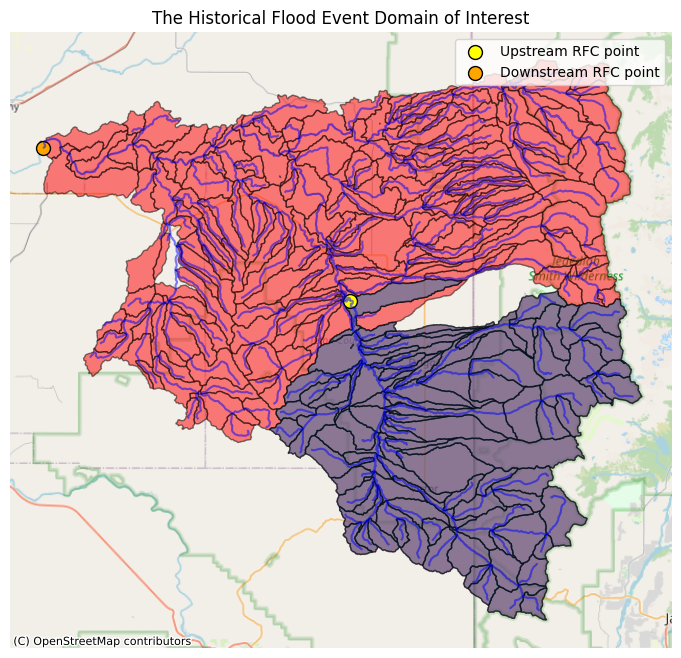

In [18]:
# get paths to the subset files
subset_gpkg = Path("historical_flood_event/rfc_geopackage_data/24472100/subset.gpkg")
downstream_gpkg = Path("historical_flood_event/rfc_geopackage_data/24472100/downstream.gpkg")

# Read Subset Files
gdf_subset = gpd.read_file(subset_gpkg)
gdf_downstream = gpd.read_file(downstream_gpkg)
gdf_downstream_flowlines = gpd.read_file(downstream_gpkg, layer="flowpaths")
gdf_subset = gdf_subset.to_crs(epsg=3857)
gdf_downstream = gdf_downstream.to_crs(epsg=3857)
gdf_downstream_flowlines = gdf_downstream_flowlines.to_crs(epsg=3857)

# Create RFC POINTS
'TEAT1'
points_data_up = {
    'name': ['DGGI1'],
    'geometry': [
        Point(-111.209069, 43.781369),
    ]
}

points_data_ds = {
    'name': ['TEAT1'],
    'geometry': [
        Point(-111.613811, 43.926986)
    ]
}
gdf_points_up = gpd.GeoDataFrame(points_data_up, crs="EPSG:4326")
gdf_points_up = gdf_points_up.to_crs(epsg=3857)

gdf_points_ds = gpd.GeoDataFrame(points_data_ds, crs="EPSG:4326")
gdf_points_ds = gdf_points_ds.to_crs(epsg=3857)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the GeoPandas DataFrame
gdf_downstream.plot(ax=ax, alpha=0.5, edgecolor='k', color="red")
gdf_subset.plot(ax=ax, alpha=0.5, edgecolor='k')
gdf_downstream_flowlines.plot(ax=ax, alpha=0.5, edgecolor='k', color="blue")
gdf_points_up.plot(ax=ax, color='yellow', edgecolor='black', marker='o', markersize=100, label="Upstream RFC point")
gdf_points_ds.plot(ax=ax, color='orange', edgecolor='black', marker='o', markersize=100, label="Downstream RFC point")

# Add the OpenStreetMap tiles as background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis
ax.axis('off')

ax.legend()

# Add a title
plt.title('The Historical Flood Event Domain of Interest')

# Show the plot
plt.show()

The purple/blue subset is the area ABOVE the RFC location whose prediction we will be using for replace and route. the red subset and blue lines are the subset, and flow network, of the DOWNSTREAM RFC point. 

## Step 1) Walking through processing messages

Since the RFC database gives us the COMID of each RFC Location, we have to convert these to HY Features IDs to work with T-Route. Let's set up our objects, then calculate outputs

In [4]:
# Since we don't have redis in the notebook, we're using this class to mock the service 
class mock_cache:
    """a class to mock a redis cache"""

    def __init__(self):
        self.data = {}

    def set(self, key, value) -> None:
        self.data[key] = value

    def get(self, key) -> str:
        return self.data[key]

    def exists(self, key) -> bool:
        return key in self.data.keys()

In [5]:
from src.rnr.app.api.services.replace_and_route import ReplaceAndRoute
rnr = ReplaceAndRoute()
r_cache = mock_cache()

Now, using the following parts of the JSON message, we can obtain the mapped HYFeatures IDs for Troute. Since we want to test if an event is flooding, let's change the saved JSON data to be flooded:

In [6]:
# normally is_flooding is determined in the message producer. We'll set it here to true
is_flooding=True

In [7]:
lid = json_data["lid"]
feature_id = json_data["feature_id"]
if is_flooding:
    # Meets assimilation criteria. Routing from upstream catchment from RFC
    try:
        mapped_feature_id = rnr.map_feature_id(
            feature_id, r_cache, subset_gpkg
        )
    except Exception as e:
        print(f"Cannot find reference fabric for ID: {feature_id}. {e.__str__()}")
        # await message.ack()
        # return
else:
    # Routing from downstream of RFC point
    try:
        mapped_feature_id = rnr.map_ds_feature_id(
            feature_id, r_cache, subset_gpkg
        )
    except Exception as e:
        print(f"Cannot find DS Point fron reference fabric for ID: {feature_id}. {e.__str__()}")
        # await message.ack()
        # return
try:
    mapped_ds_feature_id = rnr.map_feature_id(
        json_data["downstream_feature_id"], r_cache, downstream_gpkg
    )
except Exception as e:
    print(f"Cannot find reference fabric for ID: {feature_id}. {e.__str__()}")
    # await message.ack()
    # return


print(f"Old Feature ID: {feature_id}")
print(f"New HyFeatures ID: {mapped_feature_id}")
print("=====================================")
print(f"Old Downstream Feature ID: {json_data['downstream_feature_id']}")
print(f"New Downstream HyFeatures ID: {mapped_ds_feature_id}")

Old Feature ID: 24472100
New HyFeatures ID: 2977967
Old Downstream Feature ID: 24469174
New Downstream HyFeatures ID: 2977983


Now that we have the correct HYFeature Point, we can make our domain files

In [8]:
output_forcing_path = Path(f"/app/notebooks/historical_flood_event/rfc_channel_forcings/{lid}/")
domain_files_json = rnr.create_troute_domains(
    mapped_feature_id, json_data, output_forcing_path
)
domain_files_json

{'status': 'OK',
 'domain_files': [{'lid': 'DGGI1',
   'formatted_time': '202408280000',
   'file_location': '/app/notebooks/historical_flood_event/rfc_channel_forcings/DGGI1/DGGI1/202408280000.CHRTOUT_DOMAIN1.csv',
   'secondary_forecast': 8.240202358272},
  {'lid': 'DGGI1',
   'formatted_time': '202408280600',
   'file_location': '/app/notebooks/historical_flood_event/rfc_channel_forcings/DGGI1/DGGI1/202408280600.CHRTOUT_DOMAIN1.csv',
   'secondary_forecast': 8.240202358272},
  {'lid': 'DGGI1',
   'formatted_time': '202408281200',
   'file_location': '/app/notebooks/historical_flood_event/rfc_channel_forcings/DGGI1/DGGI1/202408281200.CHRTOUT_DOMAIN1.csv',
   'secondary_forecast': 8.098618125312},
  {'lid': 'DGGI1',
   'formatted_time': '202408281800',
   'file_location': '/app/notebooks/historical_flood_event/rfc_channel_forcings/DGGI1/DGGI1/202408281800.CHRTOUT_DOMAIN1.csv',
   'secondary_forecast': 8.91980667648},
  {'lid': 'DGGI1',
   'formatted_time': '202408290000',
   'file_loc

We can also determine the initial start value for our T-Route function call

In [9]:
if json_data["latest_observation"] is not None:
    initial_start = json_data["latest_observation"]
else:
    initial_start = json_data["secondary_forecast"][
        0
    ]  # Using t0 as initial start since no obs

## Step 2) Run T-Route

To make sure T-Route has access to our newly created data, we have to add it to the shared volume:

In [57]:
! cp -r /app/notebooks/historical_flood_event/rfc_channel_forcings/DGGI1  /app/data/rfc_channel_forcings/DGGI1

In [11]:
try:
    troute_json = rnr.troute(
        lid=lid,
        mapped_feature_id=mapped_feature_id,
        feature_id=feature_id,
        initial_start=initial_start,
        json_data=json_data,
    )  # Using feature_id to reference the gpkg file
except Exception as e:
    print(f"Error using T-Route: {feature_id}. {e.__str__()}")
    # await message.ack()
troute_json

{'message': 'T-Route run successfully',
 'lid': 'DGGI1',
 'feature_id': '24472100'}

In [58]:
! cp -r /app/data/troute_output/DGGI1 /app/notebooks/historical_flood_event/troute_output/DGGI1/

## Step 3) Visualizing our outputs

Now, let's see what the netcdf metadata looks like for a prediction in the middle of the time-range

In [16]:
import xarray as xr
ds = xr.open_dataset("/app/notebooks/historical_flood_event/troute_output/DGGI1/troute_output_202408251800.nc", engine="netcdf4")
ds

<xarray.Dataset>
Dimensions:     (time: 1, feature_id: 262)
Coordinates:
  * time        (time) datetime64[ns] 2024-08-25T19:00:00
  * feature_id  (feature_id) int64 2977958 2977959 2977960 ... 3031664 3031665
Data variables:
    type        (feature_id) <U2 ...
    flow        (feature_id, time) float32 ...
    velocity    (feature_id, time) float32 ...
    depth       (feature_id, time) float32 ...
    nudge       (feature_id, time) float32 ...
Attributes:
    TITLE:                OUTPUT FROM T-ROUTE
    file_reference_time:  2024-08-24_18:00:00
    code_version:

Let's find what flows are non-zero and plot them as a geopackage to show the catchment extent of the routing

In [28]:
mask = (ds.flow.values == 0).squeeze()
flow_features = ds.feature_id.values[~mask]
flow_values = ds.flow.values[~mask]

print(f"New HyFeatures upstream ID: {mapped_feature_id}")
print(f"New Downstream HyFeatures ID: {mapped_ds_feature_id}")
print("=====================================")
print(f"Flow HYFeature IDS: {flow_features}")

New HyFeatures upstream ID: 2977967
New Downstream HyFeatures ID: 2977983
Flow HYFeature IDS: [2977967 2977968 2977969 2977970 2977971 2977972 2977973 2977974 2977975
 2977976 2977977 2977978 2977979 2977980 2977981 2977982 2977983 3009211]


In [21]:
gdf_downstream.head()

,divide_id,toid,type,ds_id,areasqkm,id,lengthkm,tot_drainage_areasqkm,has_flowline,geometry
0,cat-2977959,nex-2977960,network,None,10.171346,wb-2977959,4.540352,14.897250,1,"POLYGON ((-12369052.521 5399191.440, -12369121..."
1,cat-2985652,nex-2985653,network,None,4.864052,wb-2985652,2.778140,272.312566,1,"POLYGON ((-12377402.564 5456620.341, -12377348..."
2,cat-2988462,nex-2988463,network,None,11.922745,wb-2988462,5.901375,19.352246,1,"POLYGON ((-12343420.263 5433002.430, -12343316..."
3,cat-2990659,nex-2990660,network,None,7.408350,wb-2990659,4.222540,7.408350,1,"POLYGON ((-12392065.377 5416727.161, -12392085..."
4,cat-3001383,nex-2977961,network,None,7.045196,wb-3001383,4.648726,7.045196,1,"POLYGON ((-12377951.278 5405049.205, -12377793..."


In [53]:
feature_ids_ds = np.array([int(divide.split("-")[1]) for divide in gdf_downstream["divide_id"].values])
routed_flows_mask = np.isin(feature_ids_ds, flow_features)
routed_gdf = gdf_downstream[routed_flows_mask]
routed_flowlines = gdf_downstream_flowlines[routed_flows_mask]

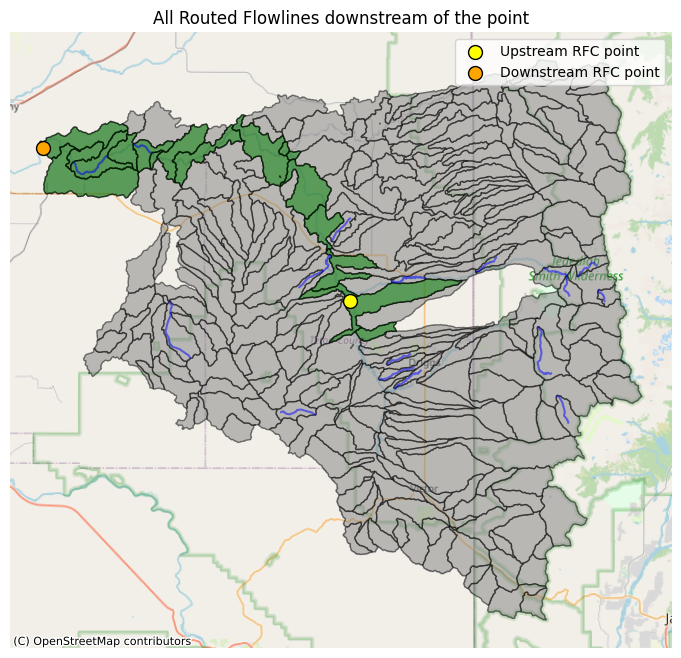

In [56]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the GeoPandas DataFrame
gdf_downstream.plot(ax=ax, alpha=0.5, edgecolor='k', color="grey")
routed_gdf.plot(ax=ax, alpha=0.5, edgecolor='k', color="green")
routed_flowlines.plot(ax=ax, alpha=0.5, edgecolor='k', color="blue")
gdf_points_up.plot(ax=ax, color='yellow', edgecolor='black', marker='o', markersize=100, label="Upstream RFC point")
gdf_points_ds.plot(ax=ax, color='orange', edgecolor='black', marker='o', markersize=100, label="Downstream RFC point")

# Add the OpenStreetMap tiles as background
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Remove axis
ax.axis('off')

ax.legend()

# Add a title
plt.title('All Routed Flowlines downstream of the point')

# Show the plot
plt.show()

The assimilation is a success! we have flow from the RFC point to the downstream location. Now, let's post process the outputs. 

## Step 4) Post Processing the Outputs and Plotting

In [61]:
plot_file_json = rnr.create_plot_file(
    json_data=json_data,
    mapped_feature_id=mapped_feature_id,
    mapped_ds_feature_id=mapped_ds_feature_id,
    troute_file_dir="/app/notebooks/historical_flood_event/troute_output/{}/troute_output_{}.nc",
    plot_dir=f"/app/notebooks/historical_flood_event/plots/{lid}/"
)

plot_file_json

{'status': 'OK',
 'plot_file_location': PosixPath('/app/notebooks/historical_flood_event/plots/DGGI1/RFC_plot_output_DGGI1_20240828_20240906.png')}

In [66]:
rnr.post_process(
    json_data, 
    mapped_feature_id, 
    is_flooding,
    troute_file_dir="/app/notebooks/historical_flood_event/troute_output/{}/troute_output_{}.nc",
    rnr_dir=f"/app/notebooks/historical_flood_event/replace_and_route/{lid}/"
)

{'status': 'OK'}

In [69]:
ds_post = xr.open_dataset("/app/notebooks/historical_flood_event/replace_and_route/DGGI1/replace_route.t202408311100z.medium_range.channel_rt.nc", engine="netcdf4")
ds_post

<xarray.Dataset>
Dimensions:     (time: 1, feature_id: 262)
Coordinates:
  * time        (time) datetime64[ns] 2024-08-31T12:00:00
  * feature_id  (feature_id) int64 2977958 2977959 2977960 ... 3031664 3031665
Data variables:
    type        (feature_id) <U2 ...
    flow        (feature_id, time) float32 ...
    velocity    (feature_id, time) float32 ...
    depth       (feature_id, time) float32 ...
    nudge       (feature_id, time) float32 ...
Attributes: (12/17)
    TITLE:                       OUTPUT FROM T-ROUTE
    file_reference_time:         2024-08-28_00:00:00
    code_version:                
    assimilated_rfc_point:       True
    observed_flood_status:       obs_not_current
    forecasted_flood_status:     no_flooding
    ...                          ...
    USGS:                        13052200
    county:                      Teton
    state:                       ID
    Latitude:                    43.781369
    Longitude:                   -111.209069
    Last_Forecast_Time:          2024-08-28T00:00:00

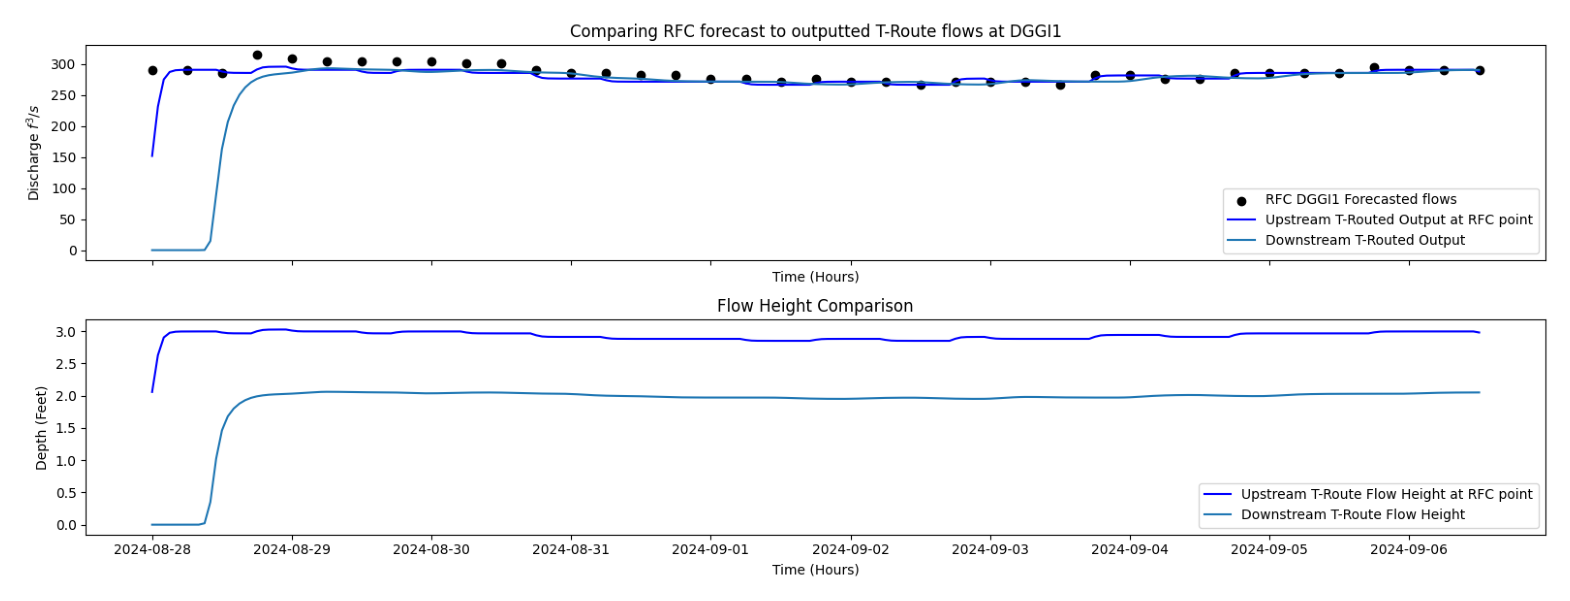

In [72]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = '/app/notebooks/historical_flood_event/plots/DGGI1/RFC_plot_output_DGGI1_20240828_20240906.png'

img = Image.open(image_path)

img_array = np.array(img)

# Display the image
plt.figure(figsize=(20, 20))
plt.imshow(img_array)
plt.axis('off')  # Hide the axis
plt.show()

# Conclusion

In the following notebook, we visualized the entire `process_request()` workflow for the RnR PI3 deliverable. We demonstrated assimilation upstream, downstream routing, t-route initial states, t-route runs, and output metadata. We hope this helps understanding and validating this product's performance!